# Question 1: AI Community

## Akshat Kumar 
## 22B4513




This notebook is divided into two parts:

## Part 1: Pretrained Faster R-CNN ResNet50 FPN

In this section, I utilize a pretrained Faster R-CNN ResNet50 FPN model. This model is a powerful object detection framework that combines the feature pyramid network (FPN) with a ResNet50 backbone. By leveraging this pretrained model, I can quickly and effectively detect objects in images without having to train the model from scratch.

## Part 2: Customized ResNet50 Model

In the second part, I employ a ResNet50 model and customize its architecture to meet the specific requirements of my task. This involves adding additional layers, modifying the existing architecture, and fine-tuning the model to optimize its performance on my dataset. Unlike the pretrained model used in the first part, this approach allows me to tailor the model to the unique characteristics of my data and task, potentially leading to improved results.



# Object Detection using COCO Dataset

This article helped me a lot:https://medium.com/voxel51/the-coco-dataset-best-practices-for-downloading-visualization-and-evaluation-68a3d7e97fb7

### Installation Instructions:

To run this notebook, you need to install the following libraries:

- FiftyOne: `pip install fiftyone`
- PIL (Python Imaging Library): `pip install pillow`
- Any other libraries required for your specific tasks can be installed using `pip install <library_name>`

In [42]:
import fiftyone as fo
import fiftyone.zoo as foz
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import layers, Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam

# List available zoo datasets
print(foz.list_zoo_datasets())

['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'kitti-multiview', 'lfw', 'mnist', 'open-images-v6', 'open-images-v7', 'places', 'quickstart', 'quickstart-geo', 'quickstart-groups', 'quickstart-video', 'sama-coco', 'ucf101', 'voc-2007', 'voc-2012']


## Downloading Dataset

In this section, we download the dataset. Since I'm utilizing a pretrained model, I have opted not to download the training dataset, and only the validation and test datasets are downloaded.



In [2]:
Data = ['train','validation','test']

In [3]:
def download_data(data):
    dataset = foz.load_zoo_dataset(
        "coco-2017",
        split=data,
        label_types=["detections"],
        classes=["person", "car", "truck", "traffic light"],
        max_samples=100,
    )
    return dataset

In [5]:
# train = download_data(Data[0])
val = download_data(Data[1])
test = download_data(Data[2])

Found annotations at 'C:\Users\Akshat Kumar\fiftyone\coco-2017\raw\instances_val2017.json'
Sufficient images already downloaded
Existing download of split 'validation' is sufficient
Loading existing dataset 'coco-2017-validation-100'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use
Test split is unlabeled; ignoring classes requirement
Found test info at 'C:\Users\Akshat Kumar\fiftyone\coco-2017\raw\image_info_test2017.json'
Sufficient images already downloaded
Existing download of split 'test' is sufficient
Loading existing dataset 'coco-2017-test-100'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [6]:
val

Name:        coco-2017-validation-100
Media type:  image
Num samples: 100
Persistent:  False
Tags:        []
Sample fields:
    id:           fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    eval_tp:      fiftyone.core.fields.IntField
    eval_fp:      fiftyone.core.fields.IntField
    eval_fn:      fiftyone.core.fields.IntField

In [1]:
session = fo.launch_app(val) 

# Using Pretrained Model: Fast RCNN resnet50

## Loading Model and Forward Pass

In [8]:
# Load model from zoo and apply it to dataset
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")

val.apply_model(model, label_field="predictions")

# Evaluate `predictions` w.r.t. labels in `ground_truth` field
results = val.evaluate_detections(
    "predictions", gt_field="ground_truth", eval_key="eval", compute_mAP=True,
)

 100% |██████████████████████████████████████████████|    1.2Gb/1.2Gb [22.0s elapsed, 0s remaining, 72.0Mb/s]      
 100% |█████████████████| 100/100 [1.9m elapsed, 0s remaining, 0.9 samples/s]     
Evaluating detections...
 100% |█████████████████| 100/100 [3.6s elapsed, 0s remaining, 46.0 samples/s]      
Performing IoU sweep...
 100% |█████████████████| 100/100 [1.9s elapsed, 0s remaining, 60.8 samples/s]      


In [3]:
# # Print the COCO AP
# print("COCO AP:",results.mAP())

# # session = fo.launch_app(val)

In [12]:
# Convert to evaluation patches
eval_patches = val.to_evaluation_patches("eval")
print(eval_patches)

# View patches in the App
session.view = eval_patches

Dataset:     coco-2017-validation-100
Media type:  image
Num patches: 2001
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


# Custom ResNet50 Model For Object Detection 

In [1]:
# # python librairies installation
# !pip install split-folders matplotlib opencv-python spicy

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import ResNet50

### Downloading the Dataset

Simply execute the following cell, and the data will be automatically downloaded without any additional steps required.


In [21]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [22]:
print(data_dir)

C:\Users\Akshat Kumar\.keras\datasets\flower_photos


C:\Users\Akshat Kumar\.keras\datasets\flower_photos\roses\10090824183_d02c613f10_m.jpg


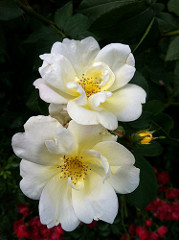

In [23]:
roses = list(data_dir.glob('roses/*'))
print(roses[0])
PIL.Image.open(str(roses[0]))
     

### Creating Training and Test Dataset 

In [76]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [77]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [78]:
# Initialize empty lists to store images and labels
test_images = []
test_labels = []

# Iterate over the dataset and extract images and labels
for image_batch, label_batch in test_ds:
    test_images.extend(image_batch.numpy())
    test_labels.extend(label_batch.numpy())

# Convert the lists to numpy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Print the shape of the images array to verify
print("Shape of images array:", test_images.shape)

Shape of images array: (734, 180, 180, 3)


### Classifying Flower Images with ResNet50 Model

In the dataset, we have images belonging to 5 different classes of flowers. We aim to classify these images using the ResNet50 model.


In [79]:
class_names = train_ds.class_names
print(class_names)
     

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


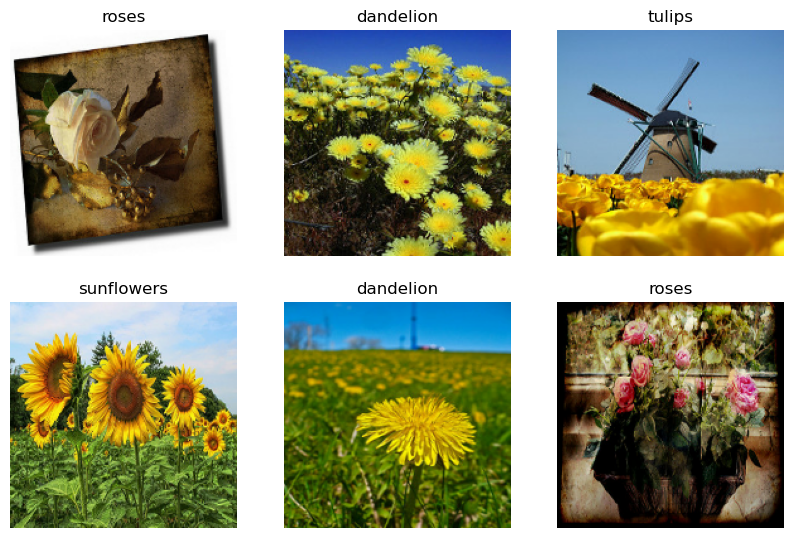

In [80]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Creating ResNet50 Architecture

In this section, we utilize a pretrained ResNet50 model as the base architecture. We then add additional layers to the model for fine-tuning and adapting it to our specific task. These additional layers include a flattening layer to convert the multidimensional feature maps into a vector, followed by dense layers with ReLU activation for feature extraction and a final dense layer with softmax activation for classification.


In [81]:
resnet_model = Sequential()

pretrained_model = ResNet50(include_top=False,
                            input_shape=(180, 180, 3),
                            pooling='avg',
                            weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [82]:
resnet_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ ?                           │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

The `compile` method is used to configure the model for training. This method specifies the optimizer, loss function, and evaluation metrics to be used during the training process.

- `optimizer=Adam(learning_rate=0.001)`: This sets the optimizer for the model to Adam with a learning rate of 0.001. Adam is a popular optimization algorithm used for training neural networks.
  
- `loss='sparse_categorical_crossentropy'`: This specifies the loss function to be used during training. Here, we're using 'sparse_categorical_crossentropy', which is suitable for multi-class classification tasks where the labels are integers.

- `metrics=['accuracy']`: This defines the evaluation metric to be used during training and validation. In this case, we're using 'accuracy', which measures the proportion of correctly classified samples.


In [83]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

## Training The Model 
The `fit` method trains the model on the training dataset (`train_ds`) and evaluates its performance on the validation dataset (`val_ds`) for a specified number of epochs (`epochs=10`). The training history, including loss and metrics values for each epoch, is stored in the `history` variable.


In [33]:
epochs=10
history = resnet_model.fit(
  train_ds,validation_data=test_ds,
  epochs=epochs
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 503ms/step - accuracy: 0.6809 - loss: 1.2142 - val_accuracy: 0.8542 - val_loss: 0.4178
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 490ms/step - accuracy: 0.8936 - loss: 0.2839 - val_accuracy: 0.8542 - val_loss: 0.3784
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 494ms/step - accuracy: 0.9409 - loss: 0.1723 - val_accuracy: 0.8583 - val_loss: 0.3972
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 482ms/step - accuracy: 0.9686 - loss: 0.0983 - val_accuracy: 0.8488 - val_loss: 0.4666
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 485ms/step - accuracy: 0.9809 - loss: 0.0635 - val_accuracy: 0.8787 - val_loss: 0.3979
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 44s 479ms/step - accuracy: 0.9896 - loss: 0.0389 - val_accuracy: 0.8747 - val_loss: 0.4162
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 486ms/step - accuracy: 0.9991 - loss: 0.0162 - val_accuracy: 0.8883 - val_loss: 0.4141
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 45s 488ms/step - accuracy: 0.9995 - loss: 0.0087 - val_accu

## Evaluating Model Performance

In this section, we visualize the accuracy versus epochs plot. The training accuracy approaches nearly 1, while the validation accuracy increases to around 0.9. This indicates that our model is slightly overfitting and not generalizing properly.

To overcome overfitting and improve the model's performance, we can implement the following strategies:

1. **Data Augmentation**: Increase the diversity of the training data by applying techniques like rotation, scaling, and flipping to generate additional training samples.

2. **Dropout**: Introduce dropout layers in the model architecture to randomly deactivate neurons during training, preventing the model from relying too heavily on specific features.

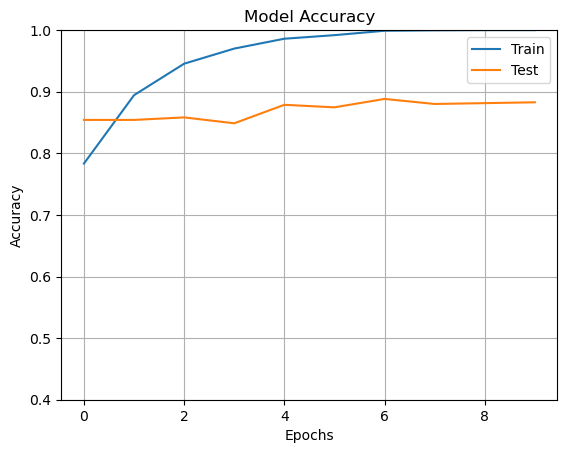

In [87]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

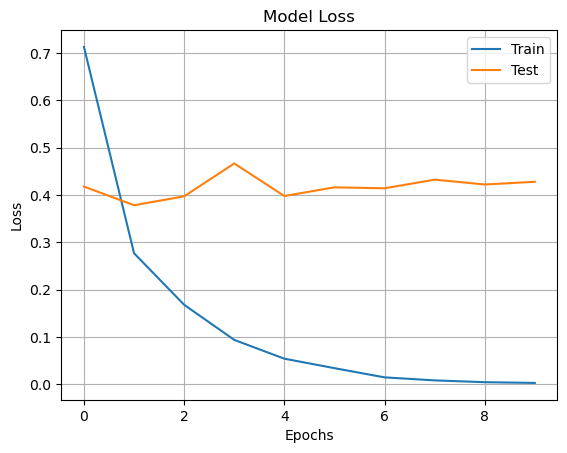

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

To evaluate the performance of the given model on the `test_ds` dataset, we calculate various metrics including precision, recall, and mAP (mean Average Precision). Here's a breakdown of the code:

1. **Generating Predictions**:
   We use the `predict` method to generate predicted probabilities for each class for the images in the `test_ds` dataset.

2. **Converting Probabilities to Predictions**:
   The predicted probabilities are converted to class predictions by selecting the class with the highest probability for each image.

3. **Extracting True Labels**:
   We extract the true labels from the `test_ds` dataset.

4. **Calculating Metrics**:
   - **Classification Report**:
     We calculate precision, recall, and other classification metrics using the `classification_report` function from scikit-learn. This provides a detailed summary of the model's performance for each class.
   - **mAP (mean Average Precision)**:
     For each class, we calculate the average precision score using the `average_precision_score` function from scikit-learn. Then, we compute the mean mAP across all classes.

5. **Printing Results**:
   Finally, we print the classification report and the mean mAP to evaluate the model's performance on the `test_ds` dataset.


In [90]:
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score

# Get the predicted probabilities for each class
y_pred_prob = resnet_model.predict(test_ds)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_prob, axis=1)

# Get true labels from the test dataset
y_true = np.concatenate([y for _, y in test_ds], axis=0)

# Calculate precision, recall, and classification report
classification_rep = classification_report(y_true, y_pred, target_names=class_names)

# Calculate mAP (mean Average Precision) for each class
average_precisions = []
for i in range(len(class_names)):
    average_precisions.append(average_precision_score(y_true == i, y_pred_prob[:, i]))

# Calculate the mean mAP across all classes
mean_average_precision = np.mean(average_precisions)

# Print the classification report and mAP
print("Classification Report:\n", classification_rep)
print("\nMean Average Precision (mAP):", mean_average_precision)


23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step
Classification Report:
               precision    recall  f1-score   support

       daisy       0.17      0.26      0.20       129
   dandelion       0.30      0.02      0.03       176
       roses       0.14      0.42      0.21       120
  sunflowers       0.14      0.07      0.09       152
      tulips       0.12      0.06      0.08       157

    accuracy                           0.15       734
   macro avg       0.17      0.17      0.12       734
weighted avg       0.18      0.15      0.11       734


Mean Average Precision (mAP): 0.18971167690526508


# Visualizing Results 

In [71]:
import cv2
def get_image():
    i = np.random.randint(0,10)
    image=cv2.imread(str(roses[i]))
    image_resized= cv2.resize(image, (img_height,img_width))
    image=np.expand_dims(image_resized,axis=0)
    return image

In [72]:
def predict_image(image):
    pred=resnet_model.predict(image)
    output_class=class_names[np.argmax(pred)]
    print("The predicted class is", output_class)
    return output_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
The predicted class is roses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The predicted class is roses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The predicted class is roses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
The predicted class is roses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
The predicted class is roses
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The predicted class is roses


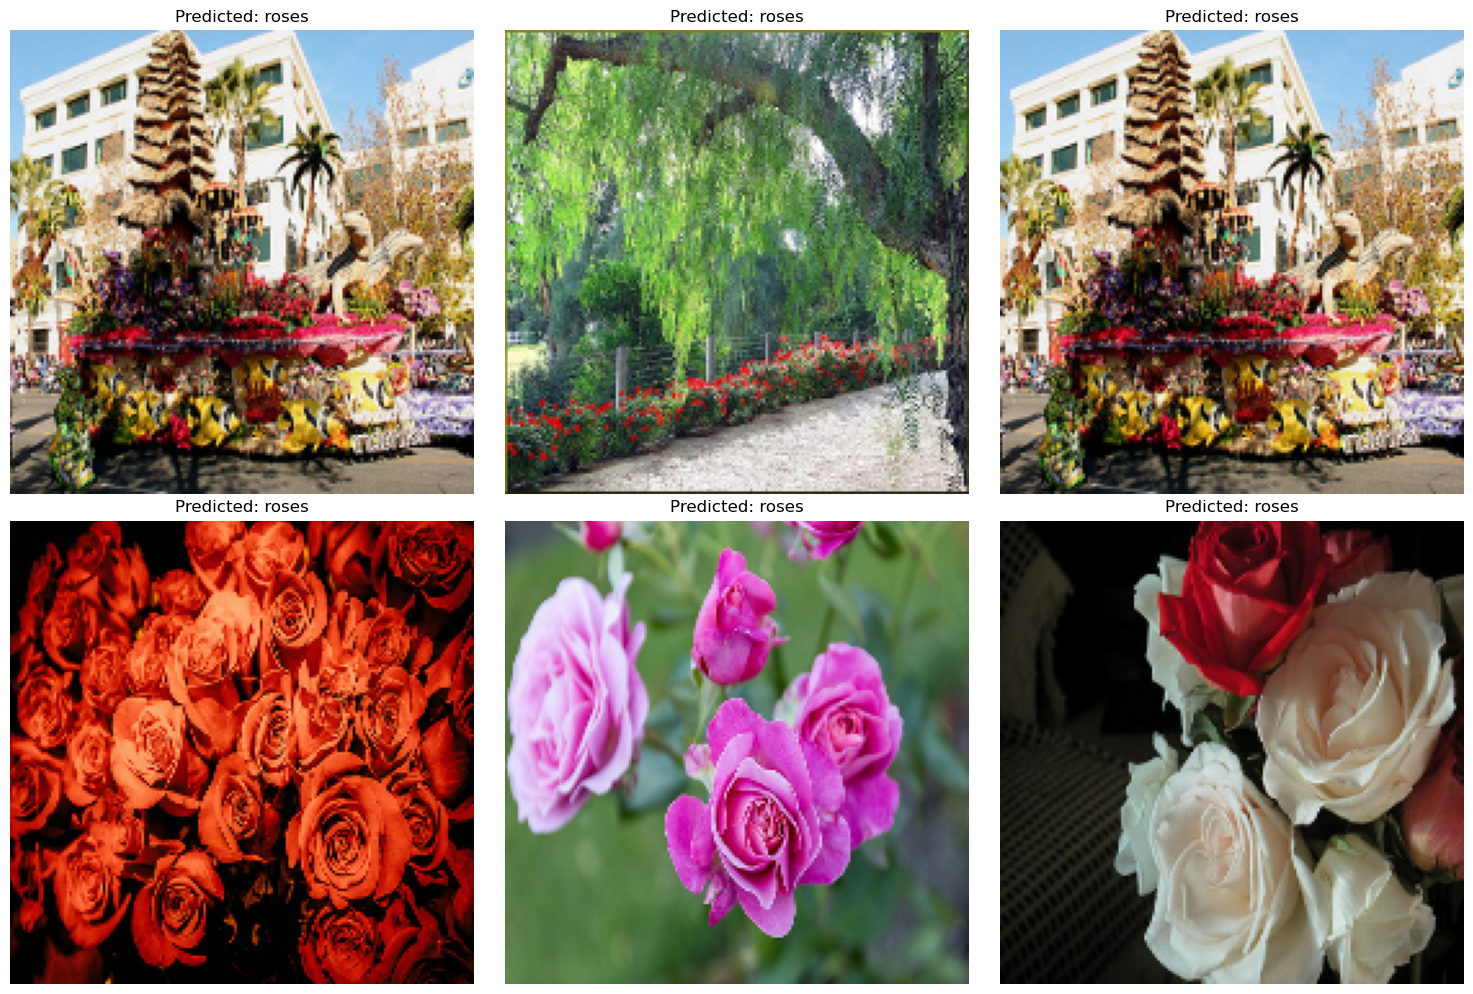

In [68]:

# Create a subplot with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i, ax in enumerate(axs.flat):
    # Get an image using get_image() function
    image = get_image()

    # Predict the class label using predict_image() function
    predicted_class = predict_image(image)

    # Plot the image with its predicted label
    ax.imshow(cv2.cvtColor(image.squeeze(), cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for displaying with matplotlib
    ax.set_title(f'Predicted: {predicted_class}')
    ax.axis('off')

plt.tight_layout()
plt.show()

**Challenges Faced:**

During the model implementation and training phases, several challenges may have been encountered:

- **Limited Training Data**: Insufficient or unrepresentative training data can lead to poor model generalization and performance.

- **Overfitting**: Overfitting may occur if the model learns to memorize the training data rather than learning to generalize patterns. This can lead to poor performance on unseen data.

- **Model Complexity**: Complex model architectures may be difficult to train effectively, requiring careful hyperparameter tuning and regularization to prevent overfitting.

- **Class Imbalance**: Class imbalance in the dataset can lead to biased model predictions and poor performance on minority classes.

**Potential Improvements and Alternative Approaches:**

To improve the model's performance, the following approaches could be explored further:

- **Data Augmentation**: Increase the diversity of the training dataset by applying various transformations such as rotation, scaling, and flipping to generate additional training samples.

- **Transfer Learning**: Utilize transfer learning by fine-tuning a pretrained model on a larger and more diverse dataset. This can leverage the learned features from the pretrained model and potentially improve performance.

- **Hyperparameter Tuning**: Optimize model hyperparameters such as learning rate, batch size, and dropout rate through systematic experimentation to find the best configuration for the given dataset.

- **Ensemble Methods**: Combine predictions from multiple models trained on different subsets of data or using different architectures to improve overall performance and robustness.

- **Addressing Class Imbalance**: Employ techniques such as class weighting, oversampling, or undersampling to mitigate the effects of class imbalance and improve model performance on minority classes.

By implementing these strategies and exploring alternative approaches, the model's performance can potentially be enhanced, leading to more accurate and reliable predictions on flower images.


# Bonus Question

## Vision-based Transformers vs. CNN-based Models

- **Architecture**: ViTs utilize the Transformer architecture, originally developed for natural language processing, while CNN-based models primarily rely on convolutional layers.

- **Attention Mechanism**: ViTs use self-attention mechanisms to capture global dependencies between image patches, enabling simultaneous analysis of all parts of the image. CNNs use local receptive fields and shared weights for feature extraction.

- **Patch Embeddings**: ViTs divide input images into fixed-size patches and flatten them into sequences, processed by Transformer encoders. CNNs process entire images through convolutional layers, capturing spatial hierarchies of features.

- **Parameter Efficiency**: ViTs tend to have fewer parameters compared to CNN-based models of similar capacity, owing to the self-attention mechanism's ability to capture global dependencies without extensive parameter sharing.

- **Performance**: ViTs demonstrate competitive performance on various computer vision tasks, including image classification, object detection, and segmentation. CNNs remain dominant, achieving state-of-the-art results on many benchmarks.

- **Generalization**: ViTs excel at tasks requiring reasoning over long-range dependencies and fine-grained details, while CNNs are proficient at capturing local spatial patterns.

- **Data Efficiency**: ViTs may require larger datasets for training compared to CNNs, as they learn representations directly from raw pixel values rather than handcrafted features.

In summary, Vision-based Transformers represent a novel approach to computer vision tasks that depart from the traditional CNN-based models. They leverage the Transformer architecture and self-attention mechanisms to capture global dependencies in images efficiently. While ViTs have shown promising results, especially on tasks requiring long-range interactions and fine-grained reasoning, they are still an active area of research, and their full potential is yet to be realized.
